# Leigh Syndrome Project 
Nishaal Ramesh Ajmera   
Supervisors: Dr Stephen McGough, Dr Amy Vincent, Dr Conor Lawless, Atif Khan

# Data Mining 

In [38]:
# importing data
# some sheet names vary across the three datasets therefore sheet_names list is changed according to the dataset
import os
import pandas as pd
import numpy as np

path =r"/Users/nishaalajmera/Documents/MScProject/Data/"

sheet_names = ["All patient data - 2021-02-11T0","Genotype","Histochemistry","All Heteroplasmy",
               "Basic Clinical Data","Phenotype","Systemic features","Family History","Social History",
               "Blood Results","Neurophysiology","Imaging","Cardiac","Opthalmology","Audiology",
               "Transplant","NMDAS","Paediatric Information","NPMDS","Mortality"]

dataframes_ncl = [pd.read_excel(os.path.join(path,"Leighs_patients_at_Newcastle_and_outreach centres_after_Albert_review.xlsx"),sheet_name=f) for f in sheet_names]


sheet_names = ["All patient data - 2021-02-11T1","Genotype","Histochemistry","All heteroplasmy",
               "Basic clinical data","Phenotype","Systemic features","Family History","Social History",
               "Blood results","Neurophysiology","Imaging","Cardiac","Opthalmology","Audiology",
               "Transplant","NMDAS","Paediatric Information","NPMDS","Mortality"]

dataframes_ucl = [pd.read_excel(os.path.join(path,"Leighs_patients_at_UCL_after_Albert_review.xlsx"),sheet_name=f) for f in sheet_names]

sheet_names = ["All patient data - 2021-02-11T1","Genotype","Histochemistry","All Heteroplasmy",
               "Basic clinical data","Phenotype","Systemic features","Family History","Social history",
               "Blood Results","Neurophysiology","Imaging","Cardiac","Opthalmology","Audiology",
               "Transplant","NMDAS","Paediatric Information","NPMDS","Mortality"]

dataframes_oxf = [pd.read_excel(os.path.join(path,"Leighs_patients_at_Oxford_after_Albert_review.xlsx"),sheet_name=f) for f in sheet_names]


In [39]:
# the dataframes are seperated into individual dataframes for each sheet 
all_ncl,gen_ncl,his_ncl,heter_ncl,clin_ncl,phen_ncl,sys_ncl,fam_ncl,soc_ncl,blood_ncl,neuro_ncl,img_ncl,car_ncl,opth_ncl,aud_ncl,trans_ncl,nmdas_ncl,paed_ncl,npdms_ncl,mort_ncl = dataframes_ncl[:]

all_ucl,gen_ucl,his_ucl,heter_ucl,clin_ucl,phen_ucl,sys_ucl,fam_ucl,soc_ucl,blood_ucl,neuro_ucl,img_ucl,car_ucl,opth_ucl,aud_ucl,trans_ucl,nmdas_ucl,paed_ucl,npdms_ucl,mort_ucl = dataframes_ucl[:]

all_oxf,gen_oxf,his_oxf,heter_oxf,clin_oxf,phen_oxf,sys_oxf,fam_oxf,soc_oxf,blood_oxf,neuro_oxf,img_oxf,car_oxf,opth_oxf,aud_oxf,trans_oxf,nmdas_oxf,paed_oxf,npdms_oxf,mort_oxf = dataframes_oxf[:]


In [40]:
# Same sheet types are concatenated into one dataframe per sheet 
all =  pd.concat([all_ncl,all_ucl,all_oxf],ignore_index=True)
gen =  pd.concat([gen_ncl,gen_ucl,gen_oxf],ignore_index=True)
his =  pd.concat([his_ncl,his_ucl,his_oxf],ignore_index=True)
heter = pd.concat([heter_ncl,heter_ucl,heter_oxf],ignore_index=True)
clin = pd.concat([clin_ncl,clin_ucl,clin_oxf],ignore_index=True)
phen = pd.concat([phen_ncl,phen_ucl,phen_oxf],ignore_index=True)
sys = pd.concat([sys_ncl,sys_ucl,sys_oxf],ignore_index=True)
fam = pd.concat([fam_ncl,fam_ucl,fam_oxf],ignore_index=True)
soc = pd.concat([soc_ncl,soc_ucl,soc_oxf],ignore_index=True)
blood = pd.concat([blood_ncl,blood_ucl,blood_oxf],ignore_index=True)
neuro = pd.concat([neuro_ncl,neuro_ucl,neuro_oxf],ignore_index=True)
img = pd.concat([img_ncl,img_ucl,img_oxf],ignore_index=True)
car = pd.concat([car_ncl,car_ucl,car_oxf],ignore_index=True)
opth = pd.concat([opth_ncl,opth_ucl,opth_oxf],ignore_index=True)
aud = pd.concat([aud_ncl,aud_ucl,aud_oxf],ignore_index=True)
trans = pd.concat([trans_ncl,trans_ucl,trans_oxf],ignore_index=True)
nmdas = pd.concat([nmdas_ncl,nmdas_ucl,nmdas_oxf],ignore_index=True)
paed = pd.concat([paed_ncl,paed_ucl,paed_oxf],ignore_index=True)
npdms = pd.concat([npdms_ncl,npdms_ucl,npdms_oxf],ignore_index=True)
mort = pd.concat([mort_ncl,mort_ucl,mort_oxf],ignore_index=True)

# Data Cleaning 

In [41]:
# the date columns for sheets that are not converted to datetime format are converted 

df_date = [his,heter,clin,phen,sys,paed]

for df in df_date:
    df['Date'] = pd.to_datetime(df['Date'],errors='coerce')


In [42]:
# pd.set_option('display.max_rows', 250)
# To check percentage of missing values in each column 
# opth.isnull().sum()/ opth.shape[0]


### Removing columns 

In [43]:
# his,npdms,nmdas not included
df_NA = [gen,heter,clin,phen,sys,fam,soc,blood,neuro,img,car,opth,aud,paed,mort]

for df in df_NA:
    limitPer = len(df) * .40
    df.dropna(axis=1,thresh=limitPer,inplace=True)


In [44]:
# Other column that contains notes from Genetics data is removed
gen.drop(columns = ["Other notes"],inplace=True)

# Age from Heterogenous column is removed as it can be calculated from columns 
heter.drop(columns = ["Age"],inplace=True)

# Three columns in Histochemistry sheet that have more than 60% missingness are removed
his.drop(columns = ["Histochemistry","COX deficient fibers (%)","RRF (%)"],inplace=True)


# Uninformative column from Neurophysiology data is removed
neuro.drop(columns = ["EEG Report"],inplace=True)

# Date columns for time-independent features are removed
paed.drop(columns = ["Date"],inplace=True)

fam.drop(columns = ["Date"],inplace=True)

# dropping columns with all NA in mortality dataset
mort.dropna(axis=1, how='all',inplace=True)

### Renaming Columns 

In [45]:

all.columns = ['UniqueID', 'Birth_date', 'Sex', 'Institution', 'Death_date']

gen.columns = ['UniqueID', 'Genetics']

his.columns = ['UniqueID','Date','His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']

heter.columns = ['UniqueID', 'Date', 'Heter_Blood']

clin.columns = ['UniqueID', 'Date', 'Weight_kg', 'FVC_predicted']

phen.columns = ['UniqueID', 'Date', 'Deafness', 'Hypotonia', 'Developmental_delay']

sys.columns = ['UniqueID','Date','Autoimmune','Endocrine','Gastrointestinal',
               'Liver','Reproductive','Respiratory','Hypertension',
               'Hypercholesterolaemia', 'Anaemia', 'Spinal_bone_disease']

fam.columns = ['UniqueID','Parental_consanguinity', 'Inheritance_Pattern']

soc.columns = ['UniqueID', 'Date', 'Smoking', 'Alcohol_consumption']

blood.columns = ['UniqueID', 'Date', 'Hemoglobin', 'Sodium',
                 'Potassium','Urea','Creatinine','Alanine_aminotransferase',
                 'Bilirubin','Alkaline_Phosphatase','Adjusted_calcium']

neuro.columns = ['UniqueID', 'Date', 'Slow_wave', 'Sharp_wave']

img.columns = ['UniqueID', 'Date', 'Other.1', 'Other.2']

car.columns = ['UniqueID', 'Date', 'ECG_Normal', 'ECHO_Normal']

opth.columns = ['UniqueID', 'Date', 'Opth_Normal']

aud.columns = ['UniqueID','Date','Aud_Normal','Sensorineural_loss_right','Sensorineural_loss_left']
trans.columns = ['UniqueID','Date','Transplant','Kidney','Liver','Heart',
                 'Lung','Pancreas','Bone_Marrow']

paed.columns = ['UniqueID', 'Consanguinity','Presentation_age','Diagnosis_age',
                'Diagnosis_basis','Reduced_movement','Abnormalities','Gestational_age',
                'Delivery_method','Birth_weight_g','Resuscitation']

mort.columns = ['UniqueID','Age_at_death','Cause_of_Death_Ia']


In [46]:
# Remove rows that have NA for Date columns in each dataset
df_date = [his,heter,clin,phen,sys,blood,neuro,car,opth,aud]

for df in df_date:
    df.dropna( how='any',subset=['Date'],inplace=True)

In [47]:
# Replacing non-numerical value for numerical columns
blood['Bilirubin'] = blood['Bilirubin'].replace(['<3'],0)


In [48]:
aud['Aud_Normal'] = aud['Aud_Normal'].replace([True],1)
aud['Sensorineural_loss_right'] = aud['Sensorineural_loss_right'].replace(['NORMAL'],0)
aud['Sensorineural_loss_left'] = aud['Sensorineural_loss_left'].replace(['NORMAL'],0)
aud['Sensorineural_loss_right'] = aud['Sensorineural_loss_right'].replace([True],1)
aud['Sensorineural_loss_left'] = aud['Sensorineural_loss_left'].replace([True],1)

### Filling in Missing Values by Deduction 

In [49]:
his[['His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']] = his[['His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']].fillna(0)
car[['ECG_Normal','ECHO_Normal']] = car[['ECG_Normal','ECHO_Normal']].fillna(0) 
opth[['Opth_Normal']] = opth[['Opth_Normal']].fillna(0) 
aud[['Aud_Normal','Sensorineural_loss_right','Sensorineural_loss_left']] = aud[['Aud_Normal','Sensorineural_loss_right','Sensorineural_loss_left']].fillna(0) 

### Joining data 

In [50]:
# Combining dataframes with temporal clinical outcomes
temporal = pd.merge(his, heter, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, clin, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, phen, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, sys, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, blood, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, neuro, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, car, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, opth, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, aud, on=["UniqueID", "Date"],how='outer')

In [51]:
# Combining dataframes for time-independent patient characteristics
char = pd.merge(all, gen, on=["UniqueID"],how='left')
char = pd.merge(char, paed, on=["UniqueID"],how='left')
char = pd.merge(char, fam, on=["UniqueID"],how='left')

In [52]:
# Merging both datasets together
df_combined =  pd.merge(char,temporal, on=["UniqueID"],how='left')

In [53]:
df_combined.shape

(354, 58)

In [54]:
categorical = ['UniqueID','Sex','Institution','Genetics','Consanguinity',
               'Diagnosis_basis','Reduced_movement','Abnormalities',
               'Delivery_method','Resuscitation','Parental_consanguinity',
               'Inheritance_Pattern','His_Normal','ComplexI','ComplexII','ComplexIII',
               'ComplexIV','ComplexV','Deafness','Hypotonia','Developmental_delay',
               'Autoimmune','Endocrine','Gastrointestinal','Liver','Reproductive',
               'Respiratory','Hypertension','Hypercholesterolaemia','Anaemia',
               'Spinal_bone_disease','Slow_wave','Sharp_wave','ECG_Normal','ECHO_Normal',
               'Opth_Normal','Aud_Normal','Sensorineural_loss_right','Sensorineural_loss_left']

numerical = ['Presentation_age','Diagnosis_age','Gestational_age','Birth_weight_g',
             'Heter_Blood','Weight_kg','FVC_predicted','Hemoglobin','Sodium','Potassium','Urea',
             'Creatinine','Alanine_aminotransferase','Bilirubin','Alkaline_Phosphatase','Adjusted_calcium']

timeseries = ['Birth_date','Death_date','Date']

### Descriptive Statistics 

In [55]:
df_combined[numerical].describe()

,Presentation_age,Diagnosis_age,Gestational_age,Heter_Blood,Weight_kg,FVC_predicted,Hemoglobin,Sodium,Potassium,Urea,Creatinine,Alanine_aminotransferase,Bilirubin,Alkaline_Phosphatase,Adjusted_calcium
count,147.000000,146.000000,216.000000,9.000000,122.000000,134.000000,34.000000,42.000000,41.000000,39.000000,37.000000,32.000000,35.000000,31.000000,25.00000
mean,1.527483,2.191781,39.319444,0.882222,20.978648,1.279080,84.688235,139.380952,4.431707,4.251282,25.810811,28.562500,5.228571,146.903226,2.43480
std,2.175722,1.599806,1.707655,0.099471,10.529962,1.234505,54.514817,2.836628,0.424523,1.957425,14.009596,51.515696,3.532086,45.142260,0.08766
min,0.000000,0.000000,32.000000,0.710000,6.795000,-1.417600,11.100000,128.000000,3.500000,0.800000,9.000000,10.000000,0.000000,89.000000,2.14000
25%,1.000000,2.000000,39.000000,0.800000,14.162500,0.379050,13.175000,139.000000,4.200000,2.400000,18.000000,14.000000,3.000000,119.000000,2.41000
50%,1.000000,2.000000,40.000000,0.950000,18.700000,1.084300,112.500000,140.000000,4.400000,4.400000,22.000000,17.000000,4.000000,135.000000,2.44000
75%,1.000000,2.000000,40.000000,0.960000,25.150000,2.259200,128.500000,141.000000,4.700000,5.650000,28.000000,20.250000,6.500000,159.500000,2.48000
max,10.000000,9.000000,42.000000,0.970000,71.000000,3.690000,155.000000,144.000000,5.400000,7.400000,68.000000,306.000000,19.000000,276.000000,2.56000


In [56]:
import warnings
warnings.filterwarnings('ignore')

df_combined[timeseries].describe()

,Birth_date,Death_date,Date
count,354,30,352
unique,57,9,305
top,2008-07-08 00:00:00,2013-08-25 00:00:00,2019-11-25 00:00:00
freq,87,10,4
first,1982-12-22 00:00:00,2012-01-23 00:00:00,1900-01-01 00:00:00
last,2018-04-10 00:00:00,2020-11-06 00:00:00,2021-02-08 00:00:00


In [57]:
# print("Total number of patients in study:",df2['Unique ID'].nunique())
print("No. patient in Histochemistry sheet:",his['UniqueID'].nunique())
print("No. patient in Heteroplasmy sheet:",heter['UniqueID'].nunique())
print("No. patient in Clinical data sheet:",clin['UniqueID'].nunique())
print("No. patient in Phenotype sheet:",phen['UniqueID'].nunique())
print("No. patient in Systemic features sheet:",sys['UniqueID'].nunique())
print("No. patient in Family sheet:",fam['UniqueID'].nunique())
print("No. patient in Blood Results sheet:",blood['UniqueID'].nunique())
print("No. patient in Neurophysiology sheet:",neuro['UniqueID'].nunique())
print("No. patient in Imaging sheet:",img['UniqueID'].nunique())
print("No. patient in Cardiac sheet:",car['UniqueID'].nunique())
print("No. patient in Opthalmology sheet:",opth['UniqueID'].nunique())
print("No. patient in Audiology sheet:",aud['UniqueID'].nunique())
print("No. patient in Paediatric info sheet:",paed['UniqueID'].nunique())

No. patient in Histochemistry sheet: 19
No. patient in Heteroplasmy sheet: 11
No. patient in Clinical data sheet: 39
No. patient in Phenotype sheet: 54
No. patient in Systemic features sheet: 14
No. patient in Family sheet: 17
No. patient in Blood Results sheet: 15
No. patient in Neurophysiology sheet: 11
No. patient in Imaging sheet: 28
No. patient in Cardiac sheet: 26
No. patient in Opthalmology sheet: 16
No. patient in Audiology sheet: 13
No. patient in Paediatric info sheet: 31


### Feature Imputation

In [58]:
# Imputation for Histochemistry features
df_combined.His_Normal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).His_Normal.fillna(method="ffill")
df_combined.ComplexI=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ComplexI.fillna(method="ffill")
df_combined.ComplexII=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ComplexII.fillna(method="ffill")
df_combined.ComplexIII=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ComplexIII.fillna(method="ffill")
df_combined.ComplexIV=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ComplexIV.fillna(method="ffill")
df_combined.ComplexV=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ComplexV.fillna(method="ffill")

In [59]:
# Imputation for Heteroplasmy features
df_combined['Heter_Blood'] = df_combined['Heter_Blood'].fillna((df_combined['Heter_Blood'].mean()))

In [60]:
# Imputation for Clinical measurements 
df_combined.Weight_kg=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Weight_kg.apply(lambda x : x.ffill().bfill())
df_combined['FVC_predicted'] = df_combined['FVC_predicted'].fillna(clin.groupby('UniqueID')['FVC_predicted'].transform('median'))

In [61]:
# Imputation for Phenotype features
df_combined.Deafness=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Deafness.fillna(method="ffill")
df_combined.Hypotonia=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Hypotonia.fillna(method="ffill")
df_combined.Developmental_delay=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Developmental_delay.fillna(method="ffill")

In [62]:
# Imputation for Systemic features  
df_combined.Autoimmune=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Autoimmune.fillna(method="ffill")
df_combined.Endocrine=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Endocrine.fillna(method="ffill")
df_combined.Gastrointestinal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Gastrointestinal.fillna(method="ffill")
df_combined.Liver=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Liver.fillna(method="ffill")
df_combined.Reproductive=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Reproductive.fillna(method="ffill")
df_combined.Respiratory=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Respiratory.fillna(method="ffill")
df_combined.Hypertension=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Hypertension.fillna(method="ffill")
df_combined.Hypercholesterolaemia=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Hypercholesterolaemia.fillna(method="ffill")
df_combined.Anaemia=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Anaemia.fillna(method="ffill")
df_combined.Spinal_bone_disease=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Spinal_bone_disease.fillna(method="ffill")

In [63]:
# Imputation for Blood features
df_combined['Hemoglobin']= df_combined['Hemoglobin'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Hemoglobin'].transform('mean'))
df_combined['Sodium']= df_combined['Sodium'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Sodium'].transform('mean'))
df_combined['Potassium']= df_combined['Potassium'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Potassium'].transform('mean'))
df_combined['Urea']= df_combined['Urea'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Urea'].transform('mean'))
df_combined['Creatinine']= df_combined['Creatinine'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Creatinine'].transform('mean'))
df_combined['Alanine_aminotransferase']= df_combined['Alanine_aminotransferase'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Alanine_aminotransferase'].transform('mean'))
df_combined['Bilirubin']= df_combined['Bilirubin'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Bilirubin'].transform('mean'))
df_combined['Alkaline_Phosphatase']= df_combined['Alkaline_Phosphatase'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Alkaline_Phosphatase'].transform('mean'))
df_combined['Adjusted_calcium']= df_combined['Adjusted_calcium'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Adjusted_calcium'].transform('mean'))

In [64]:
# Imputation for Neurophysiological features
df_combined.Slow_wave=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Slow_wave.fillna(method="ffill")
df_combined.Sharp_wave=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Sharp_wave.fillna(method="ffill")


In [65]:
# Imputation for Cardiac features
df_combined.ECG_Normal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ECG_Normal.fillna(method="ffill")
df_combined.ECHO_Normal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ECHO_Normal.fillna(method="ffill")

In [66]:
# Imputation for Opthalmology features
df_combined.Opth_Normal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Opth_Normal.fillna(method="ffill")

In [67]:
# Imputation for Audiology features
df_combined.Aud_Normal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Aud_Normal.fillna(method="ffill")
df_combined.Sensorineural_loss_right=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Sensorineural_loss_right.fillna(method="ffill")
df_combined.Sensorineural_loss_left=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Sensorineural_loss_left.fillna(method="ffill")

In [69]:
pd.set_option('display.max_columns', 250)
df_combined.head(10)

,UniqueID,Birth_date,Sex,Institution,Death_date,Genetics,Consanguinity,Presentation_age,Diagnosis_age,Diagnosis_basis,Reduced_movement,Abnormalities,Gestational_age,Delivery_method,Birth_weight_g,Resuscitation,Parental_consanguinity,Inheritance_Pattern,Date,His_Normal,ComplexI,ComplexII,ComplexIII,ComplexIV,ComplexV,Heter_Blood,Weight_kg,FVC_predicted,Deafness,Hypotonia,Developmental_delay,Autoimmune,Endocrine,Gastrointestinal,Liver,Reproductive,Respiratory,Hypertension,Hypercholesterolaemia,Anaemia,Spinal_bone_disease,Hemoglobin,Sodium,Potassium,Urea,Creatinine,Alanine_aminotransferase,Bilirubin,Alkaline_Phosphatase,Adjusted_calcium,Slow_wave,Sharp_wave,ECG_Normal,ECHO_Normal,Opth_Normal,Aud_Normal,Sensorineural_loss_right,Sensorineural_loss_left
0,20c9,2004-03-11,F,Newcastle,NaT,m.13513G>A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-09-11,NaN,NaN,NaN,NaN,NaN,NaN,0.882222,23.0,NaN,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,20c9,2004-03-11,F,Newcastle,NaT,m.13513G>A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-09-10,NaN,NaN,NaN,NaN,NaN,NaN,0.882222,23.0,NaN,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,20c9,2004-03-11,F,Newcastle,NaT,m.13513G>A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-06-01,NaN,NaN,NaN,NaN,NaN,NaN,0.882222,23.0,2.2462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,20c9,2004-03-11,F,Newcastle,NaT,m.13513G>A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.882222,23.0,2.2462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
4,459f,2008-07-08,M,Newcastle,NaT,SUCLA2,1.0,1.0,2.0,Neuroimaging,0.0,0.0,40.0,Normal,< 1000,0.0,Yes,NaN,2009-10-13,0.0,0.0,0.0,0.0,1.0,0.0,0.882222,14.2,2.2462,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6,137.5,5.100,5.90,39.0,19.0,4.000000,NaN,NaN,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
5,459f,2008-07-08,M,Newcastle,NaT,SUCLA2,1.0,1.0,2.0,Neuroimaging,0.0,0.0,40.0,Normal,< 1000,0.0,Yes,NaN,2017-01-25,0.0,0.0,0.0,0.0,1.0,0.0,0.882222,31.3,2.2462,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,139.5,4.400,5.10,22.5,19.0,4.500000,133.5,2.475,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
6,459f,2008-07-08,M,Newcastle,NaT,SUCLA2,1.0,1.0,2.0,Neuroimaging,0.0,0.0,40.0,Normal,< 1000,0.0,Yes,NaN,2016-11-08,0.0,0.0,0.0,0.0,1.0,0.0,0.882222,30.5,2.2410,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.5,140.4,4.525,5.54,20.8,163.0,6.666667,124.0,2.495,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
7,459f,2008-07-08,M,Newcastle,NaT,SUCLA2,1.0,1.0,2.0,Neuroimaging,0.0,0.0,40.0,Normal,< 1000,0.0,Yes,NaN,2016-09-28,0.0,0.0,0.0,0.0,1.0,0.0,0.882222,30.5,2.2462,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.5,140.4,4.525,5.54,20.8,163.0,6.666667,124.0,2.495,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
8,459f,2008-07-08,M,Newcastle,NaT,SUCLA2,1.0,1.0,2.0,Neuroimaging,0.0,0.0,40.0,Normal,< 1000,0.0,Yes,NaN,2016-08-02,0.0,0.0,0.0,0.0,1.0,0.0,0.882222,30.2,2.2462,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.5,140.4,4.525,5.54,20.8,163.0,6.666667,124.0,2.495,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
9,459f,2008-07-08,M,Newcastle,NaT,SUCLA2,1.0,1.0,2.0,Neuroimaging,0.0,0.0,40.0,Normal,< 1000,0.0,Yes,NaN,2016-05-31,0.0,0.0,0.0,0.0,1.0,0.0,0.882222,29.0,2.2462,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.5,140.4,4.525,5.54,20.8,163.0,6.666667,124.0,2.495,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


In [70]:
pd.set_option('display.max_rows', 250)
# To check percentage of missing values in each column 
df_combined.isnull().sum().sort_values(ascending = False)/ df_combined.shape[0]

Inheritance_Pattern         0.935028
Spinal_bone_disease         0.935028
Autoimmune                  0.935028
Endocrine                   0.935028
Reproductive                0.935028
Hypercholesterolaemia       0.935028
Respiratory                 0.932203
Liver                       0.929379
Anaemia                     0.929379
Hypertension                0.929379
Death_date                  0.915254
Gastrointestinal            0.909605
Sensorineural_loss_left     0.836158
Sensorineural_loss_right    0.836158
Aud_Normal                  0.836158
Opth_Normal                 0.768362
Adjusted_calcium            0.731638
Alkaline_Phosphatase        0.694915
Bilirubin                   0.686441
Alanine_aminotransferase    0.686441
Urea                        0.683616
Creatinine                  0.666667
Sodium                      0.663842
Potassium                   0.661017
Hemoglobin                  0.644068
Reduced_movement            0.629944
Parental_consanguinity      0.624294
A

## Data Cleaning for NPDMS data 

In [16]:
# pd.set_option('display.max_rows', 250)
# To check percentage of missing values in each column 
# npdms.isnull().sum().sort_values(ascending = False)/ npdms.shape[0]

In [17]:
# Functions to combine same columns in NPDMS across different age ranges
def npdms_combine (col1,col2,col3):
    npdms[col1].update(npdms.pop(col2))
    npdms[col1].update(npdms.pop(col3))

def npdms_combine2 (col1,col2):
    npdms[col1].update(npdms.pop(col2))


In [18]:
npdms_combine('1. Vision','1. Vision.1','1. Vision.2')
npdms_combine('2. Hearing','2. Hearing.1','2. Hearing.2')
npdms_combine('3. Communication','3. Communication.1','3. Communication.2')
npdms_combine('4. Feeding','4. Feeding.1','4. Feeding.2')
npdms_combine('5. Mobility','6. Mobility.1','6. Mobility')
npdms_combine('1. Seizures','1. Seizures.1','1. Seizures.2')
npdms_combine('2. Encephalopathy','2. Encephalopathy.1','2. Encephalopathy.2')
npdms_combine('3. Gastrointestinal','4. Gastrointestinal','4. Gastrointestinal.1')
npdms_combine('4. Endocrine','5. Endocrine','5. Endocrine.1')
npdms_combine('5. Respiratory','6. Respiratory','6. Respiratory.1')
npdms_combine('6. Cardiovascular','7. Cardiovascular','7. Cardiovascular.1')
npdms_combine('7. Renal','8. Renal','8. Renal.1')
npdms_combine('8. Liver','9. Liver','9. Liver.1')
npdms_combine('9. Blood','10. Blood','10. Blood.1')

npdms_combine('1. Growth','1. Growth.1','1. Growth.2')
npdms_combine('2. Development','2. Development.1','2. Development.2')
npdms_combine('3. Vision','3. Vision.1','3. Vision.2')
npdms_combine('4. Ptosis','4. Ptosis.1','4. Ptosis.2')
npdms_combine('5. Myopathy','5. Myopathy.1','5. Myopathy.2')
npdms_combine('6. Pyramidal','7. Pyramidal','7. Pyramidal.1')
npdms_combine('7. Extrapyramidal','8. Extrapyramidal','8. Extrapyramidal.1')
npdms_combine('8. Neuropathy','9. Neuropathy','9. Neuropathy.1')

npdms_combine("Child's overall health","Child's overall health.1","Child's overall health.2")
npdms_combine("Child's limitations in physical activities","Child's limitations in physical activities.1","Child's limitations in physical activities.2")
npdms_combine("Child's energy levels","Child's energy levels.1","Child's energy levels.2")
npdms_combine("Child's bodily pain","Child's bodily pain.1","Child's bodily pain.2")
npdms_combine("Child's behaviour","Child's behaviour.1","Child's behaviour.2")
npdms_combine("Child's interaction with others","Child's interaction with others.1","Child's interaction with others.2")
npdms_combine("Parent's emotional difficulty because of child","Parent's emotional difficulty because of child.1","Parent's emotional difficulty because of child.2")
npdms_combine('Time limited because of child','Time limited because of child.1','Time limited because of child.2')
npdms_combine('Family activity limited because of child','Family activity limited because of child.1','Family activity limited because of child.2')
npdms_combine('Financial cost','Financial cost.1','Financial cost.2')
npdms_combine('Ability of family to get along','Ability of family to get along.1','Ability of family to get along.3')
npdms_combine('Positive effects of illness','Positive effects of illness.1','Positive effects of illness.3')

In [19]:
# 2 columns 


npdms_combine2('5. Self-care','5. Self-care.1')
npdms_combine2('7. Educational achievement','7. Educational achievement.1')
npdms_combine2('System specific involvement.1','System specific involvement.2')
npdms_combine2('3. Stroke-like episodes','3. Stroke-like episodes.1')
npdms_combine2('6. Ataxia','6. Ataxia.1')



npdms_combine2("Child's limitations in everyday life","Child's limitations in everyday life.1")
npdms_combine2('Child bothered by emotional problems during past 4 weeks','Child bothered by emotional problems during past 4 weeks.1')
npdms_combine2("Child's satisfaction with themselves","Child's satisfaction with themselves.1")



npdms_combine2('Overall health','Overall health.1')
npdms_combine2('Limitations in physical activities','Limitations in physical activities.1')
npdms_combine2('Limitations in everyday life','Limitations in everyday life.1')
npdms_combine2('Energy levels','Energy levels.1')
npdms_combine2('Bodily pain','Bodily pain.1')
npdms_combine2('Emotional difficulty','Emotional difficulty.1')
npdms_combine2('Satisfaction with self','Satisfaction with self.1')
npdms_combine2('Behaviour','Behaviour.1')
npdms_combine2('Interaction with others','Interaction with others.1')
npdms_combine2('Ability of family to get along.2','Ability of family to get along.4')
npdms_combine2('Positive effects of illness.2','Positive effects of illness.4')


In [20]:
npdms = npdms.add_suffix('_npdms')
npdms.rename(columns={ 'Unique ID_npdms':'Unique ID','Date_npdms':'Date',
                    '1. Vision_npdms':'Vision_npdms_self',
                    '2. Hearing_npdms':'Hearing_npdms',
                    '3. Communication_npdms':'Communication_npdms',
                    '4. Feeding_npdms':'Feeding_npdms',
                    '5. Mobility_npdms':'Mobility_npdms',
                    '1. Seizures_npdms':'Seizures_npdms',
                    '2. Encephalopathy_npdms':'Encephalopathy_npdms',
                    '3. Gastrointestinal_npdms':'Gastrointestinal_npdms',
                    '4. Endocrine_npdms':'Endocrine_npdms',
                    '5. Respiratory_npdms':'Respiratory_npdms',
                    '6. Cardiovascular_npdms':'Cardiovascular_npdms',
                    '7. Renal_npdms':'Renal_npdms',
                    '8. Liver_npdms':'Liver_npdms',
                    '9. Blood_npdms':'Blood_npdms',
                    '1. Growth_npdms':'Growth_npdms',
                    '2. Development_npdms':'Development_npdms',
                    '3. Vision_npdms':'Vision_npdms',
                    '4. Ptosis_npdms':'Ptosis_npdms',
                    '5. Myopathy_npdms':'Myopathy_npdms',
                    '6. Pyramidal_npdms':'Pyramidal_npdms',
                    '7. Extrapyramidal_npdms':'Extrapyramidal_npdms',
                    '8. Neuropathy_npdms':'Neuropathy_npdms',
                    "Child's overall health_npdms":"Child's overall health_par",
                    "Child's limitations in physical activities_npdms":"Child's limitations in physical activities_par",
                    "Child's energy levels_npdms":"Child's energy levels_par",
                    "Child's bodily pain_npdms":"Child's bodily pain_par",
                    "Child's behaviour_npdms":"Child's behaviour_par",
                    "Child's interaction with others_npdms":"Child's interaction with others_par",
                    "Parent's emotional difficulty because of child_npdms":"Parent's emotional difficulty because of child_par",
                    'Time limited because of child_npdms':'Time limited because of child_par',
                    'Family activity limited because of child_npdms':'Family activity limited because of child_par',
                    'Financial cost_npdms':'Financial cost_par',
                    'Ability of family to get along_npdms':'Ability of family to get along_par',
                    'Positive effects of illness_npdms':'Positive effects of illness_par',   
                    '5. Self-care_npdms':'Self-care_npdms',
                    '7. Educational achievement_npdms':'Educational achievement_npdms',
                    '3. Stroke-like episodes_npdms':'Stroke-like episodes_npdms',
                    '6. Ataxia_npdms':'Ataxia_npdms', 
                    'Ability of family to get along.2_npdms':'Ability of family to get along_self',
                    'Positive effects of illness.2_npdms':'Positive effects of illness_self' },inplace=True)
 
    
    

In [21]:
# dropping columns with all NA in NPDMS data
npdms.dropna(axis=1, how='all',inplace=True)

In [26]:
# dropping columns with more than 50% NA values
npdms.drop(columns = ['Positive effects of illness_self','NPMDS (2-11) questions_npdms',          
'Ability of family to get along_self','Interaction with others_npdms','Behaviour_npdms',             
'Satisfaction with self_npdms','NPMDS (2-11 years)_npdms','Emotional difficulty_npdms',                      
'Bodily pain_npdms','Energy levels_npdms','Limitations in everyday life_npdms',             
'Limitations in physical activities_npdms','Overall health_npdms'],inplace=True)  

In [27]:
npdms.shape

(27, 43)

In [31]:
print("Total number of patients in NPDMS data:",npdms['Unique ID'].nunique())

Total number of patients in NPDMS data: 20


### Weight by Age Percentiles 

In [120]:
# subsetting the dataframe to understand changes in weight 
w = df_combined[['UniqueID','Sex','Date','Birth_date','Weight_kg']]

In [121]:
import warnings
warnings.filterwarnings('ignore')

# calculating the Age of patient in days for the date when the Weight was recorded 
w['Age_days'] = w['Date'] - w['Birth_date']
w.dropna(axis=0, how='any',inplace=True)
below5= w[w["Age_days"] < "1857 days"] # WHO data contains information for upto 5 years (1856 days)
below5.rename(columns={"Weight_kg":"Weight"}, inplace=True)



In [122]:
# Load dataframes obtained from WHO 
# perc_boys = pd.read_csv(os.path.join(path,"perc_boys.txt"),delimiter='\s+')
# perc_girls = pd.read_csv(os.path.join(path,"perc_girls.txt"),delimiter='\s+')

perc_boys = pd.read_csv("WHO_data/perc_boys.txt",delimiter='\s+')
perc_girls = pd.read_csv("WHO_data/perc_girls.txt",delimiter='\s+')

# Drop L,M,S columns 
perc_boys.drop(columns = ['L','M','S'],inplace=True)
perc_girls.drop(columns = ['L','M','S'],inplace=True)

# Add Sex column to each dataframe 
perc_boys['Sex'] = 'M'
perc_girls['Sex'] = 'F'

# Concatenate the boys and girls dataset
perc_below5 =  pd.concat([perc_boys,perc_girls],ignore_index=True)
perc_below5.rename(columns={"Age":"Age_days"}, inplace=True) # rename Age column
perc_below5['Age_days'] = pd.to_timedelta(perc_below5['Age_days'], unit='D') #converting to timedelta format



In [123]:
# Dataframe for children below 5 years with information on Age and percentiles
below5 = pd.merge(below5, perc_below5, on=["Age_days","Sex"],how='left')


In [125]:
below5.dropna(axis=0,inplace=True)

In [126]:
from scipy.interpolate import interp1d

# formula to interpolate from the percentile rows 
# given the weight of patient to estimate the percentile they are in 
def w_perc (row):
    xg = np.array([row.P01,row.P1,row.P3,row.P5,row.P10,row.P15,
                   row.P25,row.P50,row.P75,row.P85,row.P90,row.P95,row.P97,row.P99,row.P999])
    yg = np.array([0.01,1,3,5,10,15,25,50,75,85,90,95,97,99,99.9])
    f_interp = interp1d(xg,yg,fill_value="extrapolate")
    xw = row.Weight
    
    return(f_interp(xw))


In [127]:
# adding percentiles column 
below5['wba_percentiles'] = below5.apply(lambda row: w_perc(row),axis=1)
below5.drop(columns = ['P01','P1','P3','P5','P10','P15','P25','P50',
                       'P75','P85','P90','P95','P97','P99','P999'],inplace=True)


In [129]:
below5['wba_percentiles'] = below5['wba_percentiles'].astype(int)

In [130]:
below5= below5[below5["wba_percentiles"] < 100] 

<AxesSubplot:xlabel='Age_years', ylabel='wba_percentiles'>

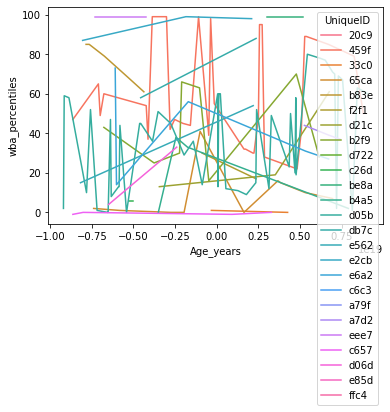

In [135]:
import seaborn as sns

below5['Age_years'] = below5['Age_days'].astype('timedelta64[Y]').astype(int)

sns.lineplot(data=below5, x='Age_years', y='wba_percentiles', hue='Sex')


In [137]:
below5['Age_years'] = below5['Age_days'].astype('timedelta64[Y]').astype(int)

<AxesSubplot:xlabel='Age_days', ylabel='wba_percentiles'>

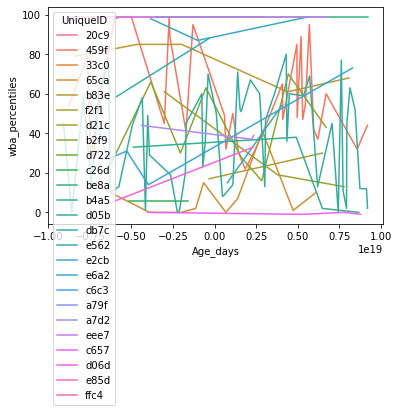

In [138]:

below5['Age_days'] = below5['Age_days'].astype('timedelta64[D]').astype(int)

sns.lineplot(data=below5, x='Age_days', y='wba_percentiles', hue='Sex')
